# Predicting Salaries of MLB Players

- We found a dataset on kaggle.com of MLB position player statistics and salary data (adjusted for inflation) for 1985-2016. (https://www.kaggle.com/datasets/andrewdecker/hitters-salary-adjusted-to-inflation)

In [1]:
# Import dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, StandardScaler

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
import warnings
warnings.filterwarnings('ignore')

## The dataset comprises 15023 observations with 29 features (4 ID features, 2 salary features, 4 fielding features, 19 offensive features) 

In [3]:
df = pd.read_csv("../Resources/Hitters_Adjusted_Salary.csv", index_col=0)
df

,yearID,playerID,salary,ADJ Salary,GS,InnOuts,PO,A,E,DP,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,1985,benedbr01,545000,1.310892e+06,67.0,1698.0,314,35,4.0,1,ATL,NL,70,208,12,42,6,0,0,20.0,0.0,1.0,22,12.0,1.0,1.0,4.0,2.0,8.0
1,1985,ceronri01,625000,1.503317e+06,76.0,2097.0,384,48,6.0,4,ATL,NL,96,282,15,61,9,0,3,25.0,0.0,3.0,29,25.0,1.0,1.0,0.0,4.0,15.0
2,1985,chambch01,800000,1.924245e+06,27.0,814.0,299,25,1.0,31,ATL,NL,101,170,16,40,7,0,3,21.0,0.0,0.0,18,22.0,4.0,0.0,0.0,1.0,5.0
3,1985,harpete01,250000,6.013267e+05,124.0,3299.0,215,10,5.0,0,ATL,NL,138,492,58,130,15,2,17,72.0,9.0,9.0,44,76.0,4.0,3.0,1.0,2.0,13.0
4,1985,hornebo01,1500000,3.607960e+06,125.0,3196.0,917,119,11.0,111,ATL,NL,130,483,61,129,25,3,27,89.0,1.0,1.0,50,57.0,4.0,1.0,0.0,6.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15018,2016,reverbe01,6250000,6.739673e+06,80.0,2141.0,170,2,2.0,1,WAS,NL,103,350,44,76,9,7,2,24.0,14.0,5.0,18,34.0,0.0,3.0,2.0,2.0,12.0
15019,2016,robincl01,534900,5.768082e+05,39.0,1071.0,285,12,2.0,30,WAS,NL,104,196,16,46,4,0,5,26.0,0.0,0.0,20,38.0,0.0,2.0,1.0,5.0,4.0
15020,2016,taylomi02,524000,5.650542e+05,48.0,1376.0,125,5,1.0,0,WAS,NL,76,221,28,51,11,0,7,16.0,14.0,3.0,14,77.0,0.0,1.0,0.0,1.0,2.0
15021,2016,werthja01,21733615,2.343639e+07,133.0,3474.0,201,5,1.0,1,WAS,NL,143,525,84,128,28,0,21,69.0,5.0,1.0,71,139.0,0.0,4.0,0.0,6.0,17.0


In [4]:
# Drop unnecessary columns

df = df.drop(columns=["salary", "teamID", "lgID"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15023 entries, 0 to 15022
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yearID      15023 non-null  int64  
 1   playerID    15023 non-null  object 
 2   ADJ Salary  15023 non-null  float64
 3   GS          15023 non-null  float64
 4   InnOuts     15023 non-null  float64
 5   PO          15023 non-null  int64  
 6   A           15023 non-null  int64  
 7   E           15023 non-null  float64
 8   DP          15023 non-null  int64  
 9   G           15023 non-null  int64  
 10  AB          15023 non-null  int64  
 11  R           15023 non-null  int64  
 12  H           15023 non-null  int64  
 13  2B          15023 non-null  int64  
 14  3B          15023 non-null  int64  
 15  HR          15023 non-null  int64  
 16  RBI         15023 non-null  float64
 17  SB          15023 non-null  float64
 18  CS          15023 non-null  float64
 19  BB          15023 non-nul

In [6]:
df.describe()

,yearID,ADJ Salary,GS,InnOuts,PO,A,E,DP,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,15023.000000,1.502300e+04,15023.000000,15023.000000,15023.000000,15023.000000,15023.000000,15023.000000,15023.000000,15023.000000,15023.000000,15023.000000,15023.000000,15023.000000,15023.000000,15023.000000,15023.000000,15023.000000,15023.000000,15023.00000,15023.000000,15023.000000,15023.000000,15023.000000,15023.000000
mean,2000.659589,3.006733e+06,77.685549,2075.221327,253.296146,87.997471,5.739999,23.156627,91.254743,294.211609,40.282500,78.564534,15.200559,1.694335,8.879784,38.364974,5.832058,2.496039,29.179525,53.51967,2.476203,2.687280,1.846435,2.530720,6.733675
std,8.961125,4.436677e+06,48.686520,1269.713281,268.514557,123.753885,5.523810,33.211613,47.239321,191.304844,31.089787,56.047751,11.787423,2.233095,9.744188,31.343438,9.481292,3.233136,24.580754,38.10855,3.980006,3.334788,2.823960,2.484991,5.559373
min,1985.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1993.000000,4.571930e+05,34.000000,939.000000,82.000000,5.000000,2.000000,1.000000,51.000000,125.000000,14.000000,29.000000,5.000000,0.000000,2.000000,13.000000,0.000000,0.000000,10.000000,23.00000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,2000.000000,1.027027e+06,75.000000,2012.000000,178.000000,25.000000,4.000000,6.000000,95.000000,274.000000,34.000000,69.000000,13.000000,1.000000,5.000000,31.000000,2.000000,1.000000,23.000000,47.00000,1.000000,2.000000,1.000000,2.000000,6.000000
75%,2008.000000,3.728370e+06,122.000000,3229.000000,300.000000,118.000000,8.000000,32.000000,135.000000,465.000000,63.000000,124.000000,24.000000,2.000000,13.000000,58.000000,7.000000,4.000000,43.000000,78.00000,3.000000,4.000000,3.000000,4.000000,10.000000
max,2016.000000,3.981021e+07,163.000000,4388.000000,1597.000000,570.000000,42.000000,176.000000,163.000000,716.000000,152.000000,262.000000,59.000000,23.000000,73.000000,165.000000,110.000000,29.000000,232.000000,223.00000,120.000000,35.000000,39.000000,17.000000,35.000000


In [7]:
df.isna().sum()

yearID        0
playerID      0
ADJ Salary    0
GS            0
InnOuts       0
PO            0
A             0
E             0
DP            0
G             0
AB            0
R             0
H             0
2B            0
3B            0
HR            0
RBI           0
SB            0
CS            0
BB            0
SO            0
IBB           0
HBP           0
SH            0
SF            0
GIDP          0
dtype: int64

In [8]:
df.duplicated().sum()

8

In [9]:
df = df.drop_duplicates()

## We focused on ADJ Salary (salary column adjusted for inflation) as our dependent variable.

In [10]:
# Make ADJ Salary into integer

df["ADJ Salary"] = df["ADJ Salary"].astype("int").round()

In [11]:
# Drop any rows with 0 salary

df = df.loc[(df["ADJ Salary"] > 0), :]

In [12]:
df["ADJ Salary"].sort_values()

3681        19522
1424       136734
1560       136734
1559       136734
1545       136734
           ...   
12972    33817652
9765     34455125
12513    36818657
12055    39167750
11599    39810209
Name: ADJ Salary, Length: 15014, dtype: int32

In [13]:
# One weird low salary outlier

df = df.loc[(df["ADJ Salary"] > 19522), :]

In [14]:
df["ADJ Salary"].sort_values()

1250       136734
1440       136734
1434       136734
1424       136734
1495       136734
           ...   
12972    33817652
9765     34455125
12513    36818657
12055    39167750
11599    39810209
Name: ADJ Salary, Length: 15013, dtype: int32

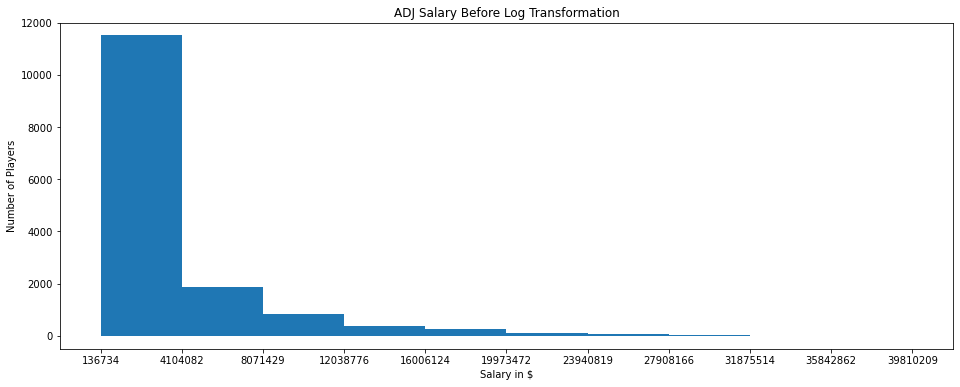

In [15]:
# ADJ Salary distribution before log transformation

fig = plt.figure(figsize=(16,6))
n, bins, patches = plt.hist(df["ADJ Salary"])
plt.xticks(bins)
plt.ylim([-500, 12000])
plt.title("ADJ Salary Before Log Transformation")
plt.xlabel("Salary in $")
plt.ylabel("Number of Players")

plt.ticklabel_format(style='plain')    # to prevent scientific notation.
plt.savefig("../static/images/salary_no_log.png")

plt.show()

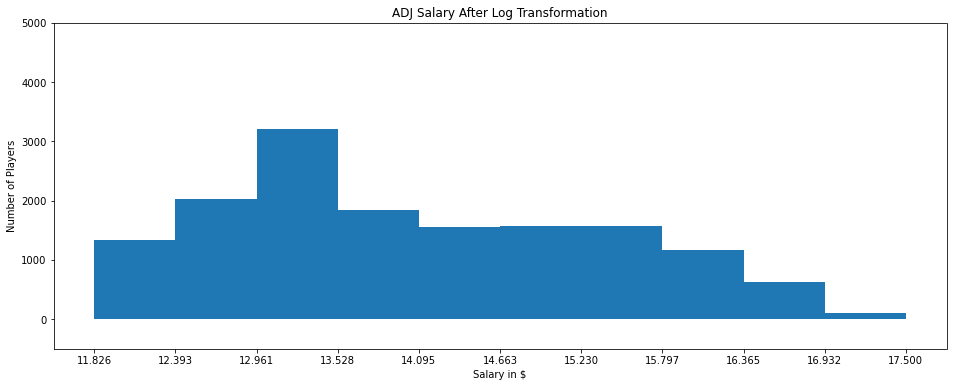

In [16]:
fig = plt.figure(figsize=(16,6))
n, bins, patches = plt.hist(np.log(df["ADJ Salary"]))
plt.xticks(bins)
plt.ylim([-500, 5000])
plt.title("ADJ Salary After Log Transformation")
plt.xlabel("Salary in $")
plt.ylabel("Number of Players")

plt.ticklabel_format(style='plain')    # to prevent scientific notation.
plt.savefig("../static/images/salary_log.png")

plt.show()

## Based on a suggestion in a Moneyball-themed post on Medium.com, we transformed the ADJ Salary column into its natural logarithm, thereby making the histogram distribution look more like a normal, Gaussian distribution. (https://medium.com/towards-data-science/did-the-money-follow-the-ball-analyzing-the-importance-of-baseball-batting-statistics-pre-144d7d452e1f)

In [17]:
# Render the natural logarithm of the salary column, but save csv with integer salaries first

# Save this dataframe to csv for others to work with

df.to_csv("../Resources/salary_integers_df.csv")

df["ADJ Salary"] = np.log(df["ADJ Salary"])

In [18]:
# Needed for smf.ols 

df = df.rename(columns={"2B":"twoB", "3B":"threeB"})

In [19]:
# 15013 observations, 25 independent variables, 1 dependent variable

df = df.drop_duplicates().reset_index(drop=True)
df

,yearID,playerID,ADJ Salary,GS,InnOuts,PO,A,E,DP,G,AB,R,H,twoB,threeB,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,1985,benedbr01,14.086218,67.0,1698.0,314,35,4.0,1,70,208,12,42,6,0,0,20.0,0.0,1.0,22,12.0,1.0,1.0,4.0,2.0,8.0
1,1985,ceronri01,14.223184,76.0,2097.0,384,48,6.0,4,96,282,15,61,9,0,3,25.0,0.0,3.0,29,25.0,1.0,1.0,0.0,4.0,15.0
2,1985,chambch01,14.470044,27.0,814.0,299,25,1.0,31,101,170,16,40,7,0,3,21.0,0.0,0.0,18,22.0,4.0,0.0,0.0,1.0,5.0
3,1985,harpete01,13.306892,124.0,3299.0,215,10,5.0,0,138,492,58,130,15,2,17,72.0,9.0,9.0,44,76.0,4.0,3.0,1.0,2.0,13.0
4,1985,hornebo01,15.098653,125.0,3196.0,917,119,11.0,111,130,483,61,129,25,3,27,89.0,1.0,1.0,50,57.0,4.0,1.0,0.0,6.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15008,2016,reverbe01,15.723522,80.0,2141.0,170,2,2.0,1,103,350,44,76,9,7,2,24.0,14.0,5.0,18,34.0,0.0,3.0,2.0,2.0,12.0
15009,2016,robincl01,13.265265,39.0,1071.0,285,12,2.0,30,104,196,16,46,4,0,5,26.0,0.0,0.0,20,38.0,0.0,2.0,1.0,5.0,4.0
15010,2016,taylomi02,13.244677,48.0,1376.0,125,5,1.0,0,76,221,28,51,11,0,7,16.0,14.0,3.0,14,77.0,0.0,1.0,0.0,1.0,2.0
15011,2016,werthja01,16.969801,133.0,3474.0,201,5,1.0,1,143,525,84,128,28,0,21,69.0,5.0,1.0,71,139.0,0.0,4.0,0.0,6.0,17.0


## After cleaning the dataset, we had 15013 observations, 25 independent variables, 1 dependent variable.

array([[<AxesSubplot:title={'center':'yearID'}>,
        <AxesSubplot:title={'center':'ADJ Salary'}>,
        <AxesSubplot:title={'center':'GS'}>,
        <AxesSubplot:title={'center':'InnOuts'}>,
        <AxesSubplot:title={'center':'PO'}>],
       [<AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'E'}>,
        <AxesSubplot:title={'center':'DP'}>,
        <AxesSubplot:title={'center':'G'}>,
        <AxesSubplot:title={'center':'AB'}>],
       [<AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'H'}>,
        <AxesSubplot:title={'center':'twoB'}>,
        <AxesSubplot:title={'center':'threeB'}>,
        <AxesSubplot:title={'center':'HR'}>],
       [<AxesSubplot:title={'center':'RBI'}>,
        <AxesSubplot:title={'center':'SB'}>,
        <AxesSubplot:title={'center':'CS'}>,
        <AxesSubplot:title={'center':'BB'}>,
        <AxesSubplot:title={'center':'SO'}>],
       [<AxesSubplot:title={'center':'IBB'}>,
        <AxesSubplot:title={'ce

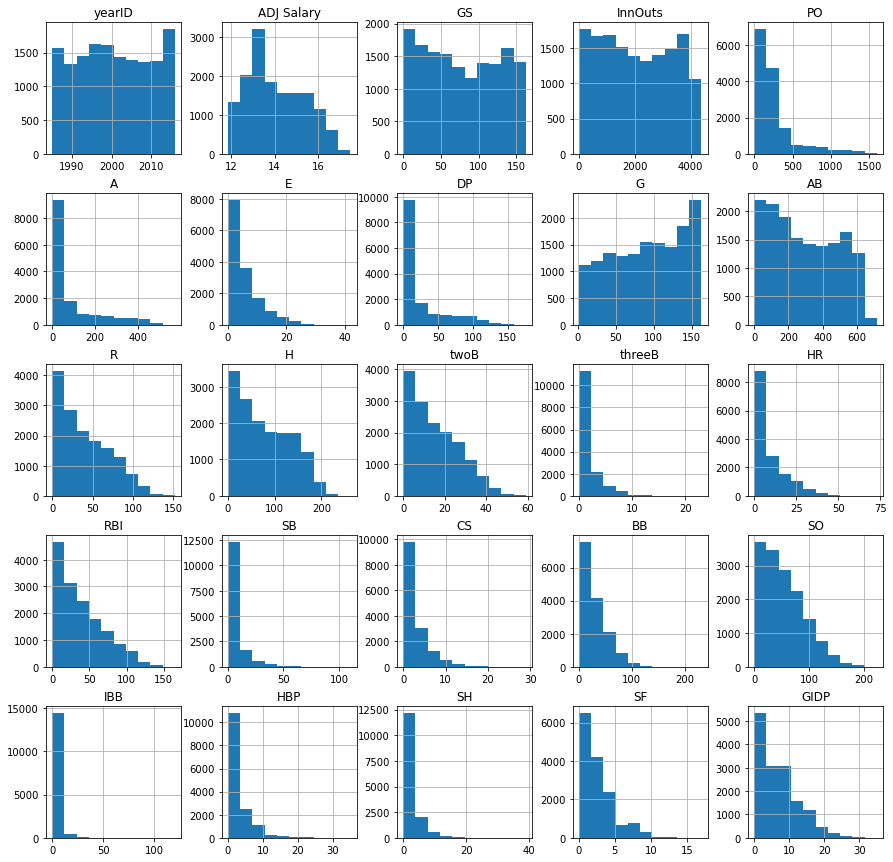

In [20]:
# Look at distributions of the variables

df.hist(figsize = (15, 15))  


## Correlation matrix analysis revealed that the offensive features were more highly correlated with our dependent variable than any of the other features in the dataset, so we focused our efforts there. 

**RBI (runs batted in), BB(walks), GS(games started), R (runs scored), HR (home runs), and InnOuts (inning outs, a measure of game time played)** were the highest-correlated with ADJ Salary. 

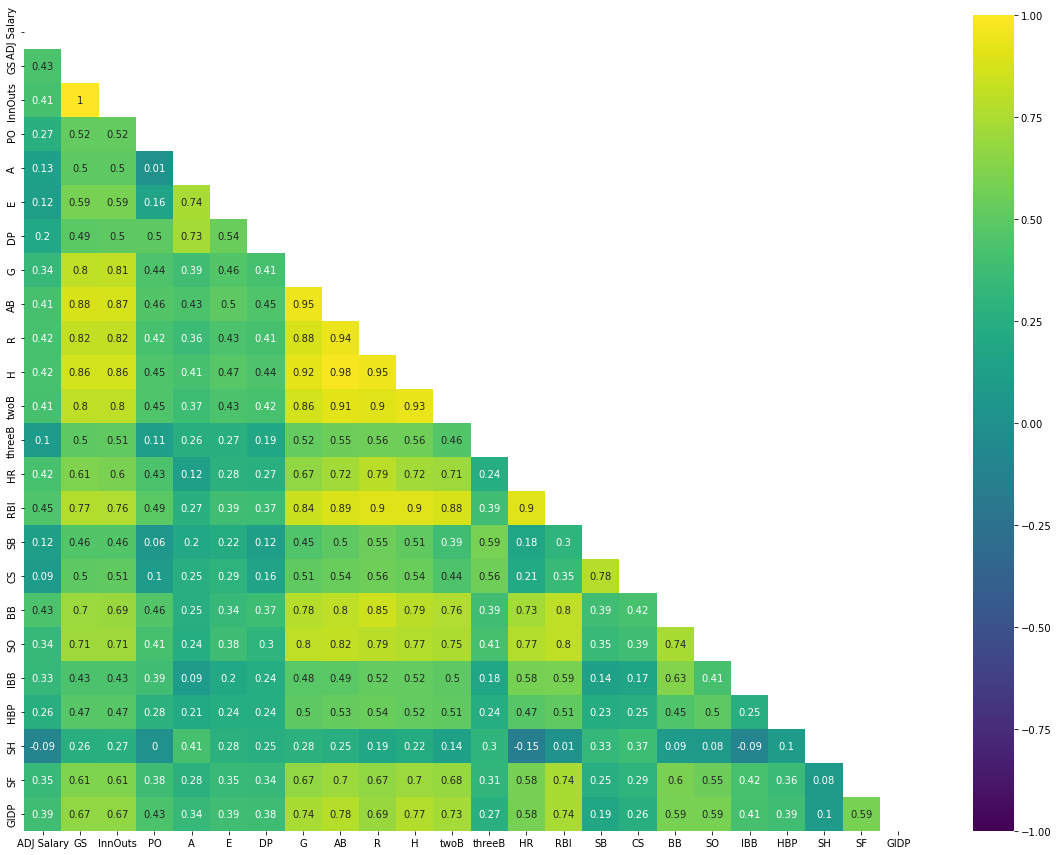

In [21]:
# Correlation matrix reveals the best independent variables: RBI, BB, GS, R, HR, InnOuts 

cols = ["ADJ Salary","GS","InnOuts","PO","A","E","DP","G","AB","R",\
        "H","twoB","threeB","HR","RBI","SB","CS","BB","SO","IBB","HBP","SH","SF","GIDP"]

matrix = df[cols].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(20,15))         # Sample figsize in inches
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='viridis', mask=mask, ax=ax)
plt.savefig("../static/images/df_correlation_matrix.png")

plt.show()

## A pairplot of these offensive features didn't show an obvious linear relationship with ADJ Salary, but unfortunately quite a bit of collinearity with each other.  

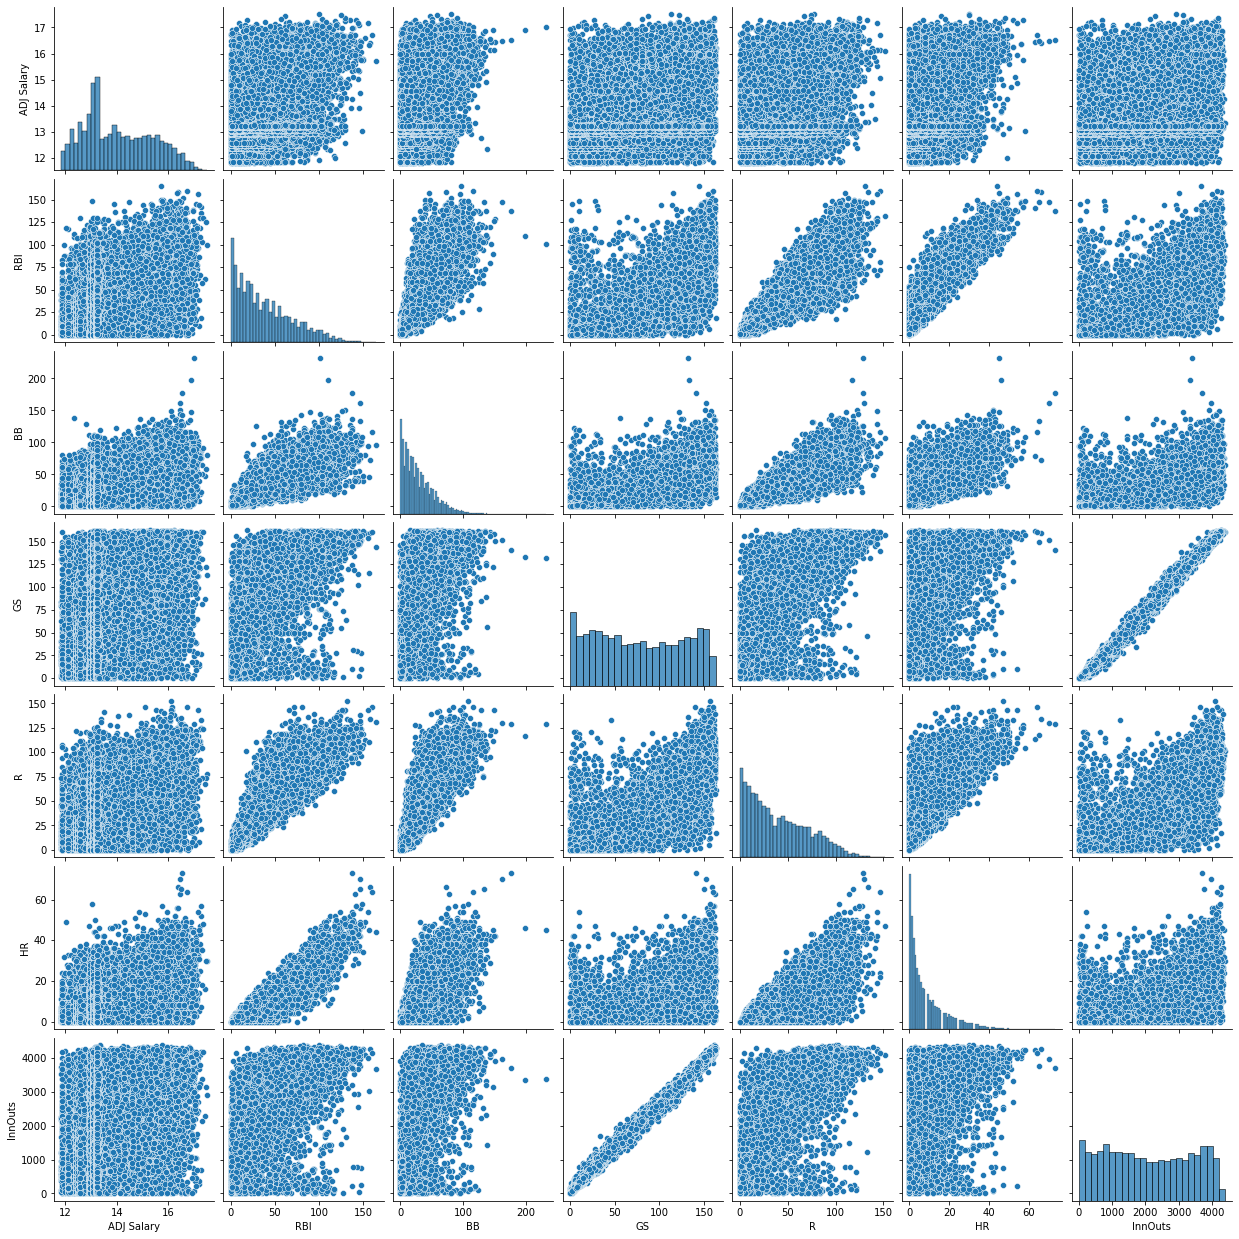

In [22]:
# Looking for multicollinearity

sns.pairplot(df[["ADJ Salary", "RBI", "BB", "GS", "R", "HR", "InnOuts"]])
plt.savefig("../static/images/df_pairplot.png")
plt.show()

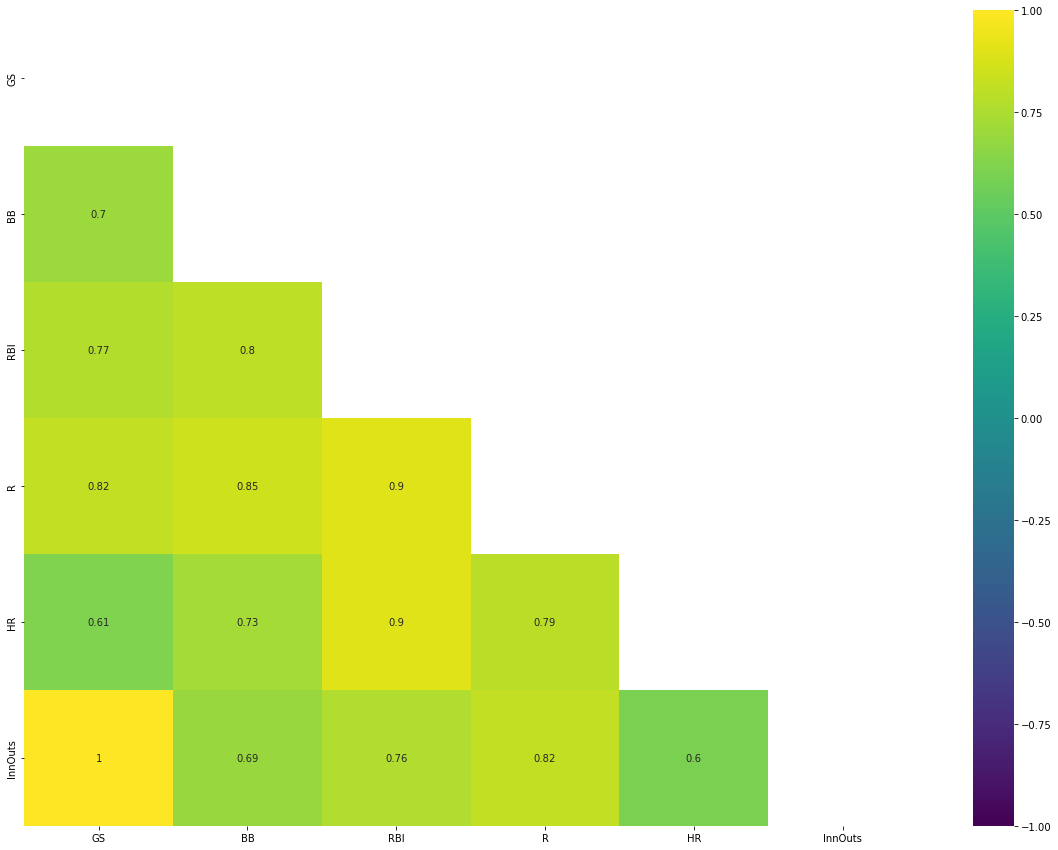

In [23]:
# Looking for multicollinearity

cols = ["GS", "BB", "RBI", "R", "HR", "InnOuts"]

matrix = df[cols].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(20,15))         # Sample figsize in inches
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='viridis', mask=mask, ax=ax)
plt.savefig("../static/images/best_vars_correlation_matrix.png")
plt.show()

## Scatter plots between each feature of interest (GS, BB, RBI, R, HR, InnOuts) and the ADJ Salary dependent variable didn't reveal any obvious linear relationship.

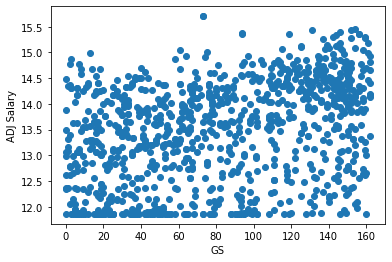

In [24]:
# Look at scatterplots for each feature vs. the target; looking for a linear relationship

plt.scatter(df["GS"][:1000], df["ADJ Salary"][:1000])
plt.xlabel("GS")
plt.ylabel("ADJ Salary")
plt.show()

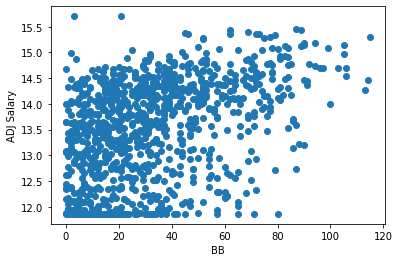

In [25]:
# Look at scatterplots for each feature vs. the target; looking for a linear relationship

plt.scatter(df["BB"][:1000], df["ADJ Salary"][:1000])
plt.xlabel("BB")
plt.ylabel("ADJ Salary")
plt.show()

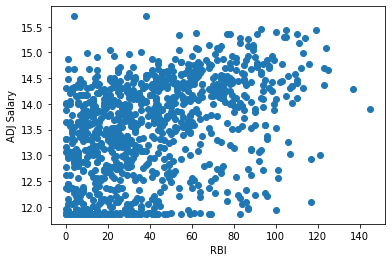

In [26]:
# Look at scatterplots for each feature vs. the target; looking for a linear relationship

plt.scatter(df["RBI"][:1000], df["ADJ Salary"][:1000])
plt.xlabel("RBI")
plt.ylabel("ADJ Salary")
plt.show()

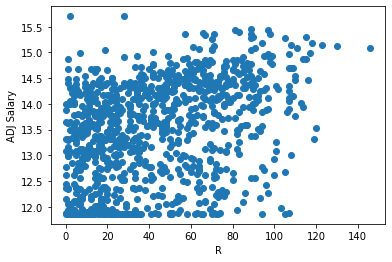

In [27]:
# Look at scatterplots for each feature vs. the target; looking for a linear relationship

plt.scatter(df["R"][:1000], df["ADJ Salary"][:1000])
plt.xlabel("R")
plt.ylabel("ADJ Salary")
plt.show()

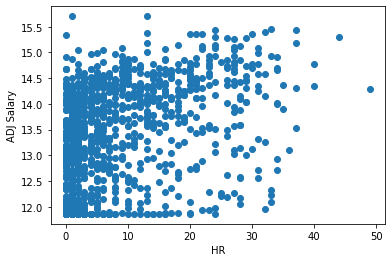

In [28]:
# Look at scatterplots for each feature vs. the target; looking for a linear relationship

plt.scatter(df["HR"][:1000], df["ADJ Salary"][:1000])
plt.xlabel("HR")
plt.ylabel("ADJ Salary")
plt.show()

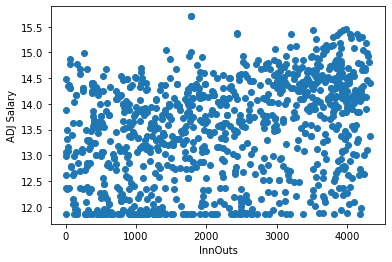

In [29]:
# Look at scatterplots for each feature vs. the target; looking for a linear relationship

plt.scatter(df["InnOuts"][:1000], df["ADJ Salary"][:1000])
plt.xlabel("InnOuts")
plt.ylabel("ADJ Salary")
plt.show()

## Simple univariate linear regression was conducted using LinearRegression(), GradientBoostingRegressor(), RandomForestRegressor(), and statsmodels ols regressor for each feature of interest. The regressors were unable to explain more than 20% of the variance in the dependent variable. 

In [30]:
# Perform linear regression on each candidate independent variable

def simple_LR(a_df, col_list):
            
    # Assign X and y

    X = a_df[col_list]

    # X = df.drop(columns=["ADJ Salary", "playerID"])

    y = a_df["ADJ Salary"]

    # Split the data into X_train, X_test, y_train, y_test

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

    # Create a scaler to standardize the data

    scaler = StandardScaler()

    # Train the scaler with the X_train data.

    scaler.fit(X_train)

    # Transform X_train and X_test.

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    LR1 = LinearRegression().fit(X_train_scaled, y_train)
    GBR1 = GradientBoostingRegressor().fit(X_train_scaled, y_train)
    RFR1 = RandomForestRegressor().fit(X_train_scaled, y_train)

    LR1_pred = LR1.predict(X_test)
    GBR1_pred = GBR1.predict(X_test)
    RFR1_pred = RFR1.predict(X_test)

    LR1_mse = mean_squared_error(y_test, LR1_pred)
    GBR1_mse = mean_squared_error(y_test, GBR1_pred)
    RFR1_mse = mean_squared_error(y_test, RFR1_pred)

    LR1_r2 = r2_score(y_test, LR1_pred)
    GBR1_r2 = r2_score(y_test, GBR1_pred)
    RFR1_r2 = r2_score(y_test, RFR1_pred)

    # Score the regression models

    print(f"LR1 Training Score: \t\t{LR1.score(X_train_scaled, y_train)}")
    print(f"LR1 Testing Score: \t{LR1.score(X_test_scaled, y_test)}")
    print(f"LR1 r2: \t\t\t{LR1_r2}")
    print(f"LR1 mse: \t\t\t{LR1_mse}\n")

    print(f"GBR1 Training Score: \t\t{GBR1.score(X_train_scaled, y_train)}")
    print(f"GBR1 Testing Score: \t{GBR1.score(X_test_scaled, y_test)}")
    print(f"GBR1 r2: \t\t\t{GBR1_r2}")
    print(f"GBR1 mse: \t\t\t{GBR1_mse}\n")

    print(f"RFR1 Training Score: \t\t{RFR1.score(X_train_scaled, y_train)}")
    print(f"RFR1 Testing Score: \t{RFR1.score(X_test_scaled, y_test)}")
    print(f"RFR1 r2: \t\t\t{RFR1_r2}")
    print(f"RFR1 mse: \t\t\t{RFR1_mse}\n")

    formula = f'y ~ {" + ".join(c for c in col_list)}'

    LR1_stats = smf.ols(formula=formula, data=X).fit()

    print(LR1_stats.summary())

In [31]:
# Score linear regression between each feature and target, for benchmarking

simple_LR(df, ["RBI"])

LR1 Training Score: 		0.19833103506548277
LR1 Testing Score: 	0.2115928666458784
LR1 r2: 			-483.9337787845963
LR1 mse: 			832.0408026485252

GBR1 Training Score: 		0.20715785302192224
GBR1 Testing Score: 	0.21145381931719187
GBR1 r2: 			-1.5207156258933647
GBR1 mse: 			4.324999297581651

RFR1 Training Score: 		0.2096691826621101
RFR1 Testing Score: 	0.2054246489364273
RFR1 r2: 			-1.984767962160618
RFR1 mse: 			5.121212090401423

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     3792.
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:23:50   Log-Likelihood:                -23716.
No. Observations:               15013   AIC:                         4.744e+04
Df Residuals

In [32]:
# Score linear regression between each feature and target, for benchmarking

simple_LR(df, ["GS"])

LR1 Training Score: 		0.18020387310341268
LR1 Testing Score: 	0.20001495022897375
LR1 r2: 			-1522.4390366402583
LR1 mse: 			2613.88976038994

GBR1 Training Score: 		0.18814711428812803
GBR1 Testing Score: 	0.19729285749401093
GBR1 r2: 			-0.67733965803988
GBR1 mse: 			2.877949725192531

RFR1 Training Score: 		0.19257036025678909
RFR1 Testing Score: 	0.18907315538581326
RFR1 r2: 			-0.608257877224873
RFR1 mse: 			2.759420427229892

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     3412.
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:23:51   Log-Likelihood:                -23869.
No. Observations:               15013   AIC:                         4.774e+04
Df Residual

In [33]:
# Score linear regression between each feature and target, for benchmarking

simple_LR(df, ["BB"])

LR1 Training Score: 		0.1838904320502288
LR1 Testing Score: 	0.1946982742186617
LR1 r2: 			-265.48961139257034
LR1 mse: 			457.2381629431893

GBR1 Training Score: 		0.1957322409556136
GBR1 Testing Score: 	0.19789900734350319
GBR1 r2: 			-3.3204231259039005
GBR1 mse: 			7.412905602220584

RFR1 Training Score: 		0.19773525975537565
RFR1 Testing Score: 	0.19259803413581855
RFR1 r2: 			-3.3406378848813354
RFR1 mse: 			7.447589728220399

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     3444.
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:23:52   Log-Likelihood:                -23856.
No. Observations:               15013   AIC:                         4.772e+04
Df Residua

In [34]:
# Score linear regression between each feature and target, for benchmarking

simple_LR(df, ["R"])

LR1 Training Score: 		0.17582349701702338
LR1 Testing Score: 	0.19176378940449068
LR1 r2: 			-449.08989475401063
LR1 mse: 			772.2562825664988

GBR1 Training Score: 		0.185336291993481
GBR1 Testing Score: 	0.1919188177742207
GBR1 r2: 			-2.0090367644468317
GBR1 mse: 			5.162852072223577

RFR1 Training Score: 		0.18911690662619773
RFR1 Testing Score: 	0.1862027603115708
RFR1 r2: 			-2.0287966571833196
RFR1 mse: 			5.196755746770488

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     3292.
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:23:53   Log-Likelihood:                -23919.
No. Observations:               15013   AIC:                         4.784e+04
Df Residual

In [35]:
# Score linear regression between each feature and target, for benchmarking

simple_LR(df, ["HR"])

LR1 Training Score: 		0.1788686931031611
LR1 Testing Score: 	0.17181040173933948
LR1 r2: 			-28.72293254866203
LR1 mse: 			50.998082082134985

GBR1 Training Score: 		0.19203449394223282
GBR1 Testing Score: 	0.18361396109457062
GBR1 r2: 			-1.5996284837012107
GBR1 mse: 			4.460396583607573

RFR1 Training Score: 		0.19211605247090713
RFR1 Testing Score: 	0.1828003935322121
RFR1 r2: 			-1.4975415702705166
RFR1 mse: 			4.2852376627263045

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     3233.
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:23:54   Log-Likelihood:                -23943.
No. Observations:               15013   AIC:                         4.789e+04
Df Resid

In [36]:
# Score linear regression between each feature and target, for benchmarking

simple_LR(df, ["InnOuts"])

LR1 Training Score: 		0.1669363280224443
LR1 Testing Score: 	0.18752386637276197
LR1 r2: 			-1005317.4915447516
LR1 mse: 			1724907.6909403154

GBR1 Training Score: 		0.18838877039440727
GBR1 Testing Score: 	0.18502612476393343
GBR1 r2: 			-0.010642090051963926
GBR1 mse: 			1.734041827122829

RFR1 Training Score: 		0.45999871661143943
RFR1 Testing Score: 	-0.012471030859086962
RFR1 r2: 			-0.00893063518190762
RFR1 mse: 			1.7311053431201113

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     3121.
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:23:56   Log-Likelihood:                -23989.
No. Observations:               15013   AIC:                         4.798e+04
D

In [37]:
# Save this dataframe to csv for others to work with

df.to_csv("../Resources/salary_logarithms_df.csv")

## Our next step was to attempt a multivariate linear regression with all of the features of interest, using the aforementioned regressors. This time the results were marginally better: the multivariate linear regressions explain approximately 26% of variance in ADJ Salary.  

## First attempt at multivariate linear regression 

In [38]:
# Assign X and y

X = df[["RBI", "BB", "GS", "R", "HR", "InnOuts"]]

y = df["ADJ Salary"]

# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

# Create a scaler to standardize the data

scaler = StandardScaler()

# Train the scaler with the X_train data.

scaler.fit(X_train)

# Transform X_train and X_test.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

LR1 = LinearRegression().fit(X_train_scaled, y_train)
GBR1 = GradientBoostingRegressor().fit(X_train_scaled, y_train)
RFR1 = RandomForestRegressor().fit(X_train_scaled, y_train)

LR1_pred = LR1.predict(X_test)
GBR1_pred = GBR1.predict(X_test)
RFR1_pred = RFR1.predict(X_test)

LR1_mse = mean_squared_error(y_test, LR1_pred)
GBR1_mse = mean_squared_error(y_test, GBR1_pred)
RFR1_mse = mean_squared_error(y_test, RFR1_pred)

LR1_r2 = r2_score(y_test, LR1_pred)
GBR1_r2 = r2_score(y_test, GBR1_pred)
RFR1_r2 = r2_score(y_test, RFR1_pred)

# Score the regression models

print(f"LR1 Training Score: \t\t{LR1.score(X_train_scaled, y_train)}")
print(f"LR1 Testing Score: \t{LR1.score(X_test_scaled, y_test)}")
print(f"LR1 r2: \t\t\t{LR1_r2}")
print(f"LR1 mse: \t\t\t{LR1_mse}\n")

print(f"GBR1 Training Score: \t\t{GBR1.score(X_train_scaled, y_train)}")
print(f"GBR1 Testing Score: \t{GBR1.score(X_test_scaled, y_test)}")
print(f"GBR1 r2: \t\t\t{GBR1_r2}")
print(f"GBR1 mse: \t\t\t{GBR1_mse}\n")

print(f"RFR1 Training Score: \t\t{RFR1.score(X_train_scaled, y_train)}")
print(f"RFR1 Testing Score: \t{RFR1.score(X_test_scaled, y_test)}")
print(f"RFR1 r2: \t\t\t{RFR1_r2}")
print(f"RFR1 mse: \t\t\t{RFR1_mse}\n")


LR1_stats = smf.ols(formula = "y ~ RBI + BB + GS + R + HR", data=X).fit()

LR1_stats.summary()

LR1 Training Score: 		0.26408208460257143
LR1 Testing Score: 	0.26779174719716403
LR1 r2: 			-34397969.612189606
LR1 mse: 			59019429.723743014

GBR1 Training Score: 		0.30875066474260193
GBR1 Testing Score: 	0.2661742893884983
GBR1 r2: 			-1.179518252510825
GBR1 mse: 			3.739578877658958

RFR1 Training Score: 		0.8894144409138002
RFR1 Testing Score: 	0.234606124486039
RFR1 r2: 			-1.1400771722393612
RFR1 mse: 			3.671906569558163



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     935.9
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:24:02   Log-Likelihood:                -23370.
No. Observations:               15013   AIC:                         4.675e+04
Df Residuals:                   15007   BIC:                         4.680e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.1379      0.018    737.843      0.000      13.103      13.173
RBI            0.0050      0.001      4.844      0.000       0.003       0.007
BB             0.0113      0.001     15.159      0.000       0.010       0.013
GS             0.0071      0.000     20.062      0.000       0.006       0.008
R             -0.0086      0.001     -9.711      0.000      -0.010      -0.007
HR             0.0214      0.002      9.059      0.000       0.017       0.026
==============================================================================
Omnibus:                      309.992   Durbin-Watson:                   1.494
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.566
Skew:                           0.203   Prob(JB):                     6.34e-50
Kurtosis:                       2.555   Cond. No.                         228.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## We were disappointed with these results, so we took a different approach. What if we aggregated the dataset, and took the mean values of all of a player's stats over his career (including salary)? Could a multivariate linear regression on this aggregation perform any better?

## Second attempt at multivariate linear regression ... a more savvy approach this time 

In [39]:
# I'm now aggregating the data across players' careers, taking the mean of all variables

# aka, "Relative Strength Analysis"

df = pd.read_csv("../Resources/salary_logarithms_df.csv", index_col="Unnamed: 0")

agg_df = df.groupby(["playerID"]).mean()

agg_df

,yearID,ADJ Salary,GS,InnOuts,PO,A,E,DP,G,AB,R,H,twoB,threeB,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
playerID,,,,,,,,,,,,,,,,,,,,,,,,,
abbotje01,1999.500000,12.817947,34.000000,887.000000,71.000000,0.5,2.000000,0.000000,53.500000,139.500000,18.500000,36.750000,8.000000,0.500000,4.250000,20.250000,1.500000,1.250000,9.500000,21.250000,0.500000,0.750000,1.250000,1.750000,2.250000
abbotku01,1997.100000,13.326749,54.700000,1460.200000,101.600000,135.6,9.100000,29.600000,70.200000,204.400000,27.300000,52.300000,10.900000,2.300000,6.200000,24.200000,2.200000,1.100000,13.300000,57.100000,1.100000,1.700000,2.100000,1.200000,3.700000
abercre01,2006.000000,12.947527,67.000000,1862.000000,176.000000,3.0,5.000000,1.000000,111.000000,255.000000,39.000000,54.000000,12.000000,2.000000,5.000000,24.000000,6.000000,5.000000,18.000000,78.000000,2.000000,3.000000,4.000000,1.000000,2.000000
abernbr01,2002.666667,12.849163,43.000000,1167.666667,93.000000,124.0,4.666667,31.000000,43.000000,165.666667,16.333333,38.000000,6.000000,1.333333,0.666667,13.333333,3.666667,1.333333,8.666667,16.333333,0.000000,2.000000,3.333333,0.666667,3.333333
abnersh01,1990.166667,12.463545,40.500000,1204.000000,116.833333,2.0,0.333333,0.500000,62.666667,132.166667,14.000000,29.666667,6.000000,0.500000,1.500000,10.666667,0.833333,1.333333,6.833333,24.166667,1.666667,1.166667,0.833333,1.166667,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuberjo01,1996.000000,12.099589,20.000000,543.000000,145.000000,11.0,2.000000,10.000000,30.000000,91.000000,7.000000,23.000000,4.000000,0.000000,1.000000,10.000000,1.000000,0.000000,6.000000,11.000000,1.000000,0.000000,1.000000,1.000000,3.000000
zuletju01,2001.000000,12.585454,23.000000,657.000000,213.000000,7.0,2.000000,11.000000,49.000000,106.000000,11.000000,23.000000,3.000000,0.000000,6.000000,24.000000,0.000000,1.000000,8.000000,32.000000,1.000000,3.000000,0.000000,1.000000,3.000000
zuninmi01,2014.500000,13.237969,113.000000,3061.000000,909.500000,64.0,5.000000,5.500000,121.500000,394.000000,39.500000,74.000000,15.500000,1.000000,16.500000,44.000000,0.000000,2.000000,19.000000,145.000000,0.500000,11.000000,4.000000,3.000000,9.000000


In [40]:
agg_df.duplicated().sum()

0

In [41]:
agg_df.to_csv("../Resources/aggregated_df.csv")

## We grouped the dataset by playerID, took the mean of every feature, and ended up with 2468 observations.

array([[<AxesSubplot:title={'center':'yearID'}>,
        <AxesSubplot:title={'center':'ADJ Salary'}>,
        <AxesSubplot:title={'center':'GS'}>,
        <AxesSubplot:title={'center':'InnOuts'}>,
        <AxesSubplot:title={'center':'PO'}>],
       [<AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'E'}>,
        <AxesSubplot:title={'center':'DP'}>,
        <AxesSubplot:title={'center':'G'}>,
        <AxesSubplot:title={'center':'AB'}>],
       [<AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'H'}>,
        <AxesSubplot:title={'center':'twoB'}>,
        <AxesSubplot:title={'center':'threeB'}>,
        <AxesSubplot:title={'center':'HR'}>],
       [<AxesSubplot:title={'center':'RBI'}>,
        <AxesSubplot:title={'center':'SB'}>,
        <AxesSubplot:title={'center':'CS'}>,
        <AxesSubplot:title={'center':'BB'}>,
        <AxesSubplot:title={'center':'SO'}>],
       [<AxesSubplot:title={'center':'IBB'}>,
        <AxesSubplot:title={'ce

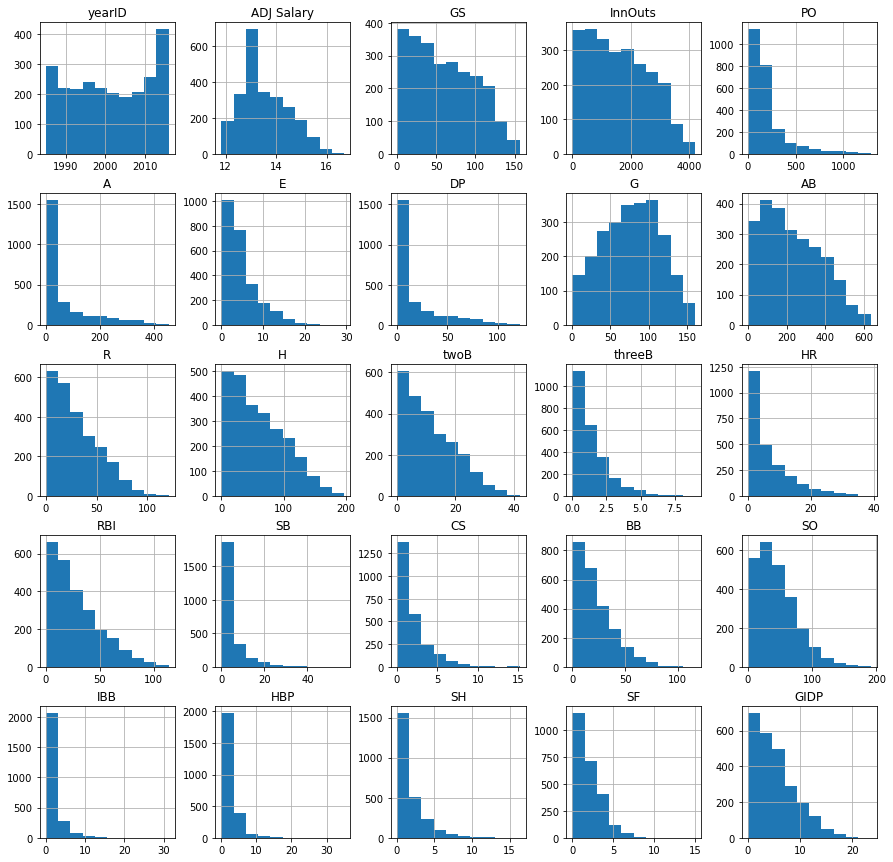

In [42]:
# Look at distributions of the variables

agg_df.hist(figsize = (15, 15))  

## Correlation analysis, pairplot visualization, and scatter plots now revealed stronger correlations and linear relationships between RBI, H, R, twoB (doubles) and ADJ Salary, but again with lots of multicollinearity. 

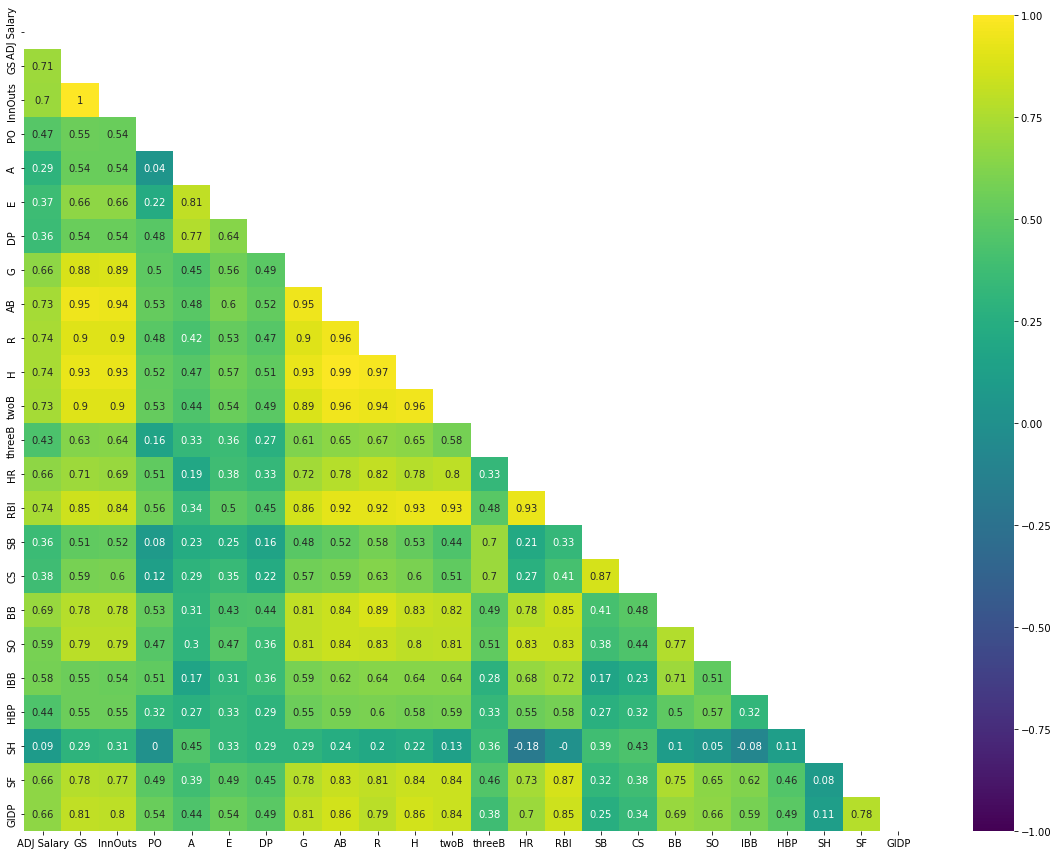

In [43]:
# Correlation matrix reveals the best independent variables: RBI, H, R, twoB

cols = ["ADJ Salary","GS","InnOuts","PO","A","E","DP","G","AB","R",\
        "H","twoB","threeB","HR","RBI","SB","CS","BB","SO","IBB","HBP","SH","SF","GIDP"]

matrix = agg_df[cols].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(20,15))         # Sample figsize in inches
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='viridis', mask=mask, ax=ax)
plt.savefig("../static/images/agg_df_correlation_matrix.png")
plt.show()

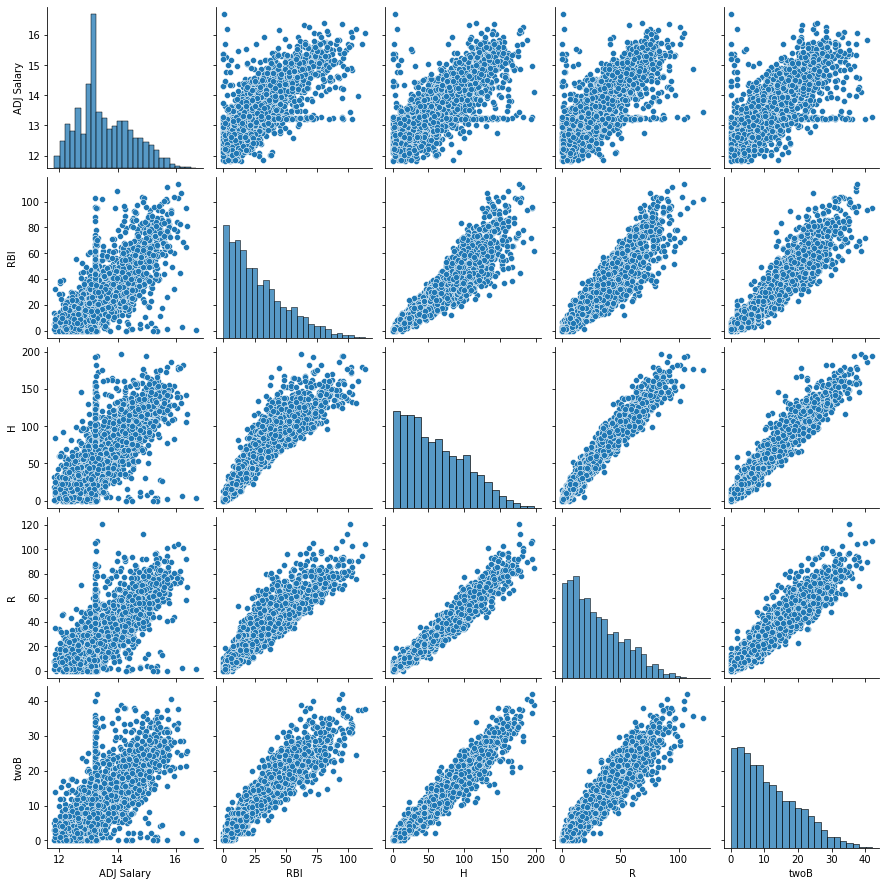

In [44]:
# Looking for multicollinearity

sns.pairplot(agg_df[["ADJ Salary","RBI", "H", "R", "twoB"]])

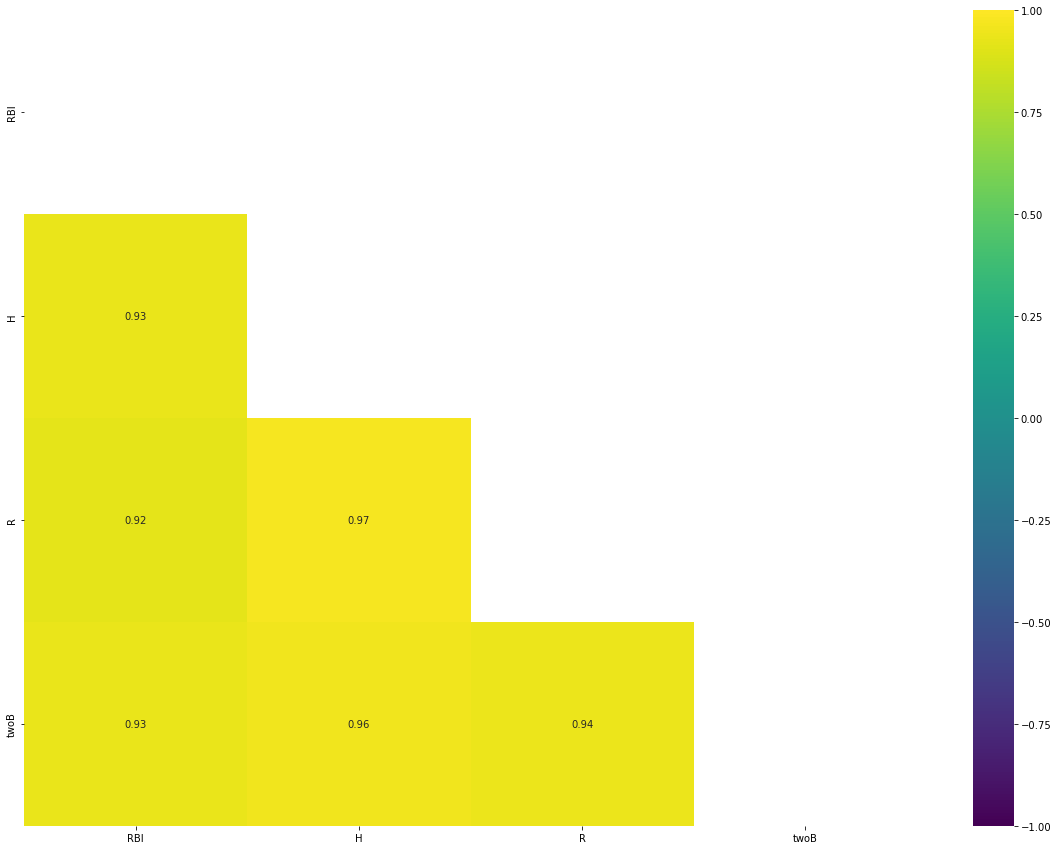

In [45]:
# Lots of multicollinearity, but all these vars plot a linear relationship with ADJ Salary

cols = ["RBI", "H", "R", "twoB"]

matrix = agg_df[cols].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(20,15))         # Sample figsize in inches
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='viridis', mask=mask, ax=ax)
plt.savefig("../static/images/agg_df_bestfeatures_correlation_matrix.png")
plt.show()

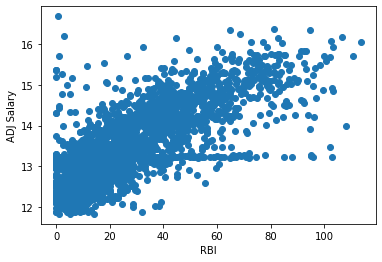

In [46]:
# Look at scatterplots for each feature vs. the target; looking for a linear relationship

plt.scatter(agg_df["RBI"], agg_df["ADJ Salary"])
plt.xlabel("RBI")
plt.ylabel("ADJ Salary")
plt.show()

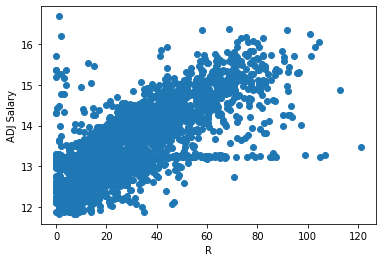

In [47]:
# Look at scatterplots for each feature vs. the target; looking for a linear relationship

plt.scatter(agg_df["R"], agg_df["ADJ Salary"])
plt.xlabel("R")
plt.ylabel("ADJ Salary")
plt.show()

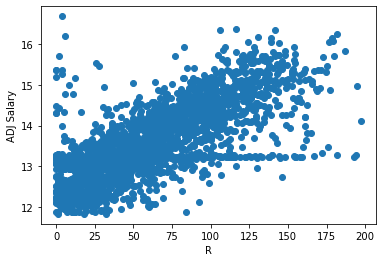

In [48]:
# Look at scatterplots for each feature vs. the target; looking for a linear relationship

plt.scatter(agg_df["H"], agg_df["ADJ Salary"])
plt.xlabel("R")
plt.ylabel("ADJ Salary")
plt.show()

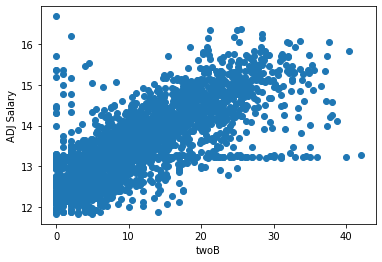

In [49]:
# Look at scatterplots for each feature vs. the target; looking for a linear relationship

plt.scatter(agg_df["twoB"], agg_df["ADJ Salary"])
plt.xlabel("twoB")
plt.ylabel("ADJ Salary")
plt.show()

## Simple linear regressions for each new feature of interest and our dependent variable now showed over 50% explained variance.

In [50]:
# Score linear regression between each feature and target, for benchmarking

simple_LR(agg_df, ["RBI"])

LR1 Training Score: 		0.5587114213767878
LR1 Testing Score: 	0.5263642902641976
LR1 r2: 			-679.1437379316643
LR1 mse: 			584.2684179829887

GBR1 Training Score: 		0.622834520943153
GBR1 Testing Score: 	0.5418880078457078
GBR1 r2: 			-5.2873522631420995
GBR1 mse: 			5.401066208826705

RFR1 Training Score: 		0.7488164063634707
RFR1 Testing Score: 	0.4544315591306498
RFR1 r2: 			-5.122136554046887
RFR1 mse: 			5.259139854740805

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     3021.
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:24:13   Log-Likelihood:                -2312.2
No. Observations:                2468   AIC:                             4628.
Df Residuals:   

In [51]:
# Score linear regression between each feature and target, for benchmarking

simple_LR(agg_df, ["R"])

LR1 Training Score: 		0.5440764391321746
LR1 Testing Score: 	0.5360626149052452
LR1 r2: 			-731.701202254047
LR1 mse: 			629.4172075994583

GBR1 Training Score: 		0.6242977013976643
GBR1 Testing Score: 	0.5537341210974667
GBR1 r2: 			-0.13938695675613766
GBR1 mse: 			0.9787751876078375

RFR1 Training Score: 		0.7519304909793536
RFR1 Testing Score: 	0.47557213693843126
RFR1 r2: 			-0.22681426341618383
RFR1 mse: 			1.0538784507888197

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     2919.
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:24:13   Log-Likelihood:                -2335.4
No. Observations:                2468   AIC:                             4675.
Df Residua

In [52]:
# Score linear regression between each feature and target, for benchmarking

simple_LR(agg_df, ["H"])

LR1 Training Score: 		0.5463261881719665
LR1 Testing Score: 	0.5436819226940894
LR1 r2: 			-2850.6885142594474
LR1 mse: 			2449.70503128271

GBR1 Training Score: 		0.6338940946732557
GBR1 Testing Score: 	0.5390536975148312
GBR1 r2: 			-0.5362853845419209
GBR1 mse: 			1.3197254949760047

RFR1 Training Score: 		0.7912589308408668
RFR1 Testing Score: 	0.4440431124533404
RFR1 r2: 			-0.5147905482659008
RFR1 mse: 			1.3012606422024056

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     2962.
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:24:14   Log-Likelihood:                -2325.6
No. Observations:                2468   AIC:                             4655.
Df Residuals

In [53]:
# Score linear regression between each feature and target, for benchmarking

simple_LR(agg_df, ["twoB"])

LR1 Training Score: 		0.5274799842028941
LR1 Testing Score: 	0.5286500055587497
LR1 r2: 			-95.65359420329852
LR1 mse: 			83.0289825930954

GBR1 Training Score: 		0.6103622623026534
GBR1 Testing Score: 	0.565303501077949
GBR1 r2: 			-0.7387587099977184
GBR1 mse: 			1.4936575080936485

RFR1 Training Score: 		0.7027575536730026
RFR1 Testing Score: 	0.5471530676326886
RFR1 r2: 			-0.7200704556391053
RFR1 mse: 			1.477603612130164

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     2757.
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:24:14   Log-Likelihood:                -2373.1
No. Observations:                2468   AIC:                             4750.
Df Residuals:  

## Now a return to multivariate linear regression on these new features yielded similar values, achieving 59% explained variance on the GradientBoostingRegressor() model. (GBR1 Testing Score: 	0.5907526209843459)

In [54]:
agg_df = pd.read_csv("../Resources/aggregated_df.csv", index_col="playerID")
agg_df

# Assign X and y

X = agg_df[["RBI", "R", "twoB", "H"]]

y = agg_df["ADJ Salary"]

# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

# Create a scaler to standardize the data

scaler = StandardScaler()

# Train the scaler with the X_train data.

scaler.fit(X_train)

# Transform X_train and X_test.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

LR2 = LinearRegression().fit(X_train_scaled, y_train)
GBR2 = GradientBoostingRegressor().fit(X_train_scaled, y_train)
RFR2 = RandomForestRegressor().fit(X_train_scaled, y_train)

LR2_pred = LR2.predict(X_test)
GBR2_pred = GBR2.predict(X_test)
RFR2_pred = RFR2.predict(X_test)

LR2_mse = mean_squared_error(y_test, LR2_pred)
GBR2_mse = mean_squared_error(y_test, GBR2_pred)
RFR2_mse = mean_squared_error(y_test, RFR2_pred)

LR2_r2 = r2_score(y_test, LR2_pred)
GBR2_r2 = r2_score(y_test, GBR2_pred)
RFR2_r2 = r2_score(y_test, RFR2_pred)

# Score the regression models

print(f"LR2 Training Score: \t\t{LR2.score(X_train_scaled, y_train)}")
print(f"LR2 Testing Score: \t{LR2.score(X_test_scaled, y_test)}")
print(f"LR2 r2: \t\t\t{LR2_r2}")
print(f"LR2 mse: \t\t\t{LR2_mse}\n")

print(f"GBR2 Training Score: \t\t{GBR2.score(X_train_scaled, y_train)}")
print(f"GBR2 Testing Score: \t{GBR2.score(X_test_scaled, y_test)}")
print(f"GBR2 r2: \t\t\t{GBR2_r2}")
print(f"GBR2 mse: \t\t\t{GBR2_mse}\n")

print(f"RFR2 Training Score: \t\t{RFR2.score(X_train_scaled, y_train)}")
print(f"RFR2 Testing Score: \t{RFR2.score(X_test_scaled, y_test)}")
print(f"RFR2 r2: \t\t\t{RFR2_r2}")
print(f"RFR2 mse: \t\t\t{RFR2_mse}\n")

# LR1_stats = smf.ols(formula = 'y ~ yearID + GS + InnOuts + PO + A + E + DP + G + AB + R + H +\
# twoB + threeB + HR + RBI + SB + CS + BB + SO + IBB + HBP + SH + SF + GIDP', data=X).fit()

LR2_stats = smf.ols(formula = "y ~ RBI + R + H + twoB", data=X).fit()
                    
LR2_stats.summary()

LR2 Training Score: 		0.5747928663372394
LR2 Testing Score: 	0.5576906206506109
LR2 r2: 			-1334.7893247237123
LR2 mse: 			1147.4920255654886

GBR2 Training Score: 		0.6924557355944168
GBR2 Testing Score: 	0.5861481423230565
GBR2 r2: 			-0.11277148885970045
GBR2 mse: 			0.9559115244518431

RFR2 Training Score: 		0.9233708959853862
RFR2 Testing Score: 	0.5437858052123805
RFR2 r2: 			-0.5331438438453555
RFR2 mse: 			1.317026796288587



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     818.6
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:24:15   Log-Likelihood:                -2255.7
No. Observations:                2468   AIC:                             4521.
Df Residuals:                    2463   BIC:                             4550.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.6330      0.021    600.767      0.000      12.592      12.674
RBI            0.0154      0.002      9.771      0.000       0.012       0.019
R              0.0072      0.002      3.111      0.002       0.003       0.012
H              0.0051      0.001      3.419      0.001       0.002       0.008
twoB          -0.0026      0.006     -0.457      0.648      -0.014       0.009
==============================================================================
Omnibus:                      188.411   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              789.234
Skew:                           0.252   Prob(JB):                    4.17e-172
Kurtosis:                       5.724   Cond. No.                         157.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

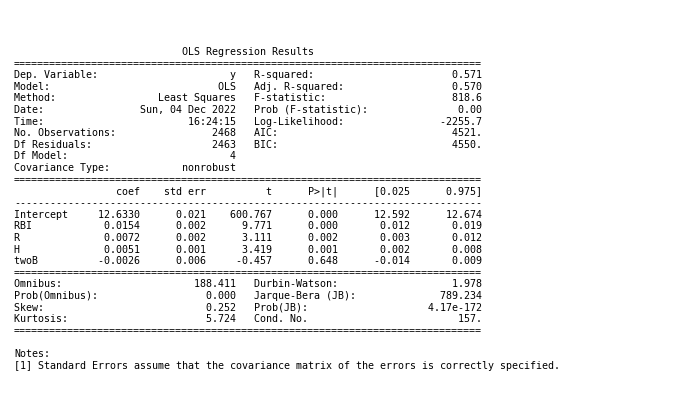

In [55]:
# Save smf.ols summary (from StackOverFlow)

plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(LR2_stats.summary()), {'fontsize': 10}, fontproperties = 'monospace') 
plt.axis('off')
plt.savefig("../static/images/LR2_stats_summary.png")

## Results: 
- the linear regressions on the aggregated data now explain nearly 60% of variance!


## We attempted to improve the scores using ensemble methods (Ridge and ElasticNet), but they did not improve upon the previous results. 

# Linear Regression Ensemble Methods

In [56]:
# LinearRegression()

agg_df = pd.read_csv("../Resources/aggregated_df.csv", index_col="playerID")
agg_df

# Assign X and y

X = agg_df[["H", "R", "RBI", "twoB"]]

y = agg_df["ADJ Salary"]

# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

# Create a scaler to standardize the data

scaler = StandardScaler()

# Train the scaler with the X_train data.

scaler.fit(X_train)

# Transform X_train and X_test.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression().fit(X_train_scaled, y_train)

# Score the model

print(f"STDSCALER Linear Regression Score: {model.score(X_train_scaled, y_train)}")
print(f"STDSCALER Linear Regression Score: {model.score(X_test_scaled, y_test)}")

STDSCALER Linear Regression Score: 0.5747928663372395
STDSCALER Linear Regression Score: 0.5576906206506109


MSE: 1.7024311794563367
R2: -0.9817910233179121
Ridge Regression Score: -0.9648438791485221
Ridge Regression Score: -0.9817910233179121


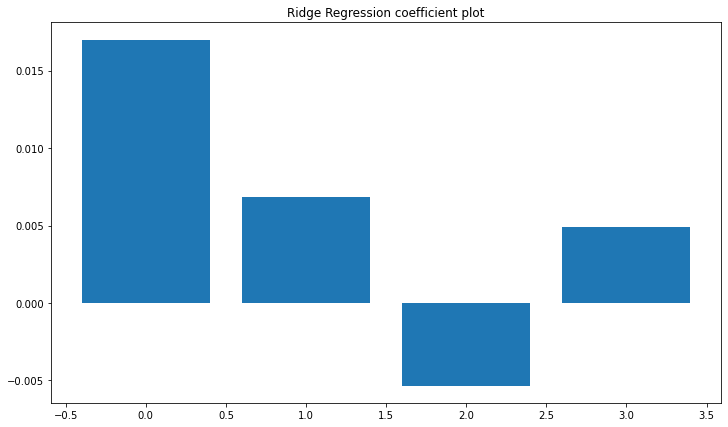

New ridge regression score: 0.5805006831505928


In [57]:
agg_df = pd.read_csv("../Resources/aggregated_df.csv", index_col="playerID")
agg_df

# Assign X and y

X = agg_df[["RBI", "R", "twoB", "H"]]

y = agg_df["ADJ Salary"]

# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

# Create a scaler to standardize the data

scaler = StandardScaler()

# Train the scaler with the X_train data.

scaler.fit(X_train)

# Transform X_train and X_test.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_reg = Ridge().fit(X_train, y_train)

predicted = ridge_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"MSE: {mse}")
print(f"R2: {r2}") 

# Score the model

print(f"Ridge Regression Score: {ridge_reg.score(X_train_scaled, y_train)}")
print(f"Ridge Regression Score: {ridge_reg.score(X_test_scaled, y_test)}")

plt.bar(np.arange(len(ridge_reg.coef_)), ridge_reg.coef_)
plt.title(f'Ridge Regression coefficient plot')
plt.show()     

sel = SelectFromModel(ridge_reg)
sel.fit(X_train_scaled, y_train)
SelectFromModel(estimator=Ridge())

X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)

scaler = StandardScaler().fit(X_selected_train)

X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

new_ridge_reg = LinearRegression().fit(X_selected_train_scaled, y_train)
print(f"New ridge regression score: {new_ridge_reg.score(X_selected_test_scaled, y_test)}")

MSE: 1.6859390827802743
R2: -0.9625926618553657
ElasticNet Regression Score: -0.9459733712263023
ElasticNet Regression Score: -0.9625926618553657


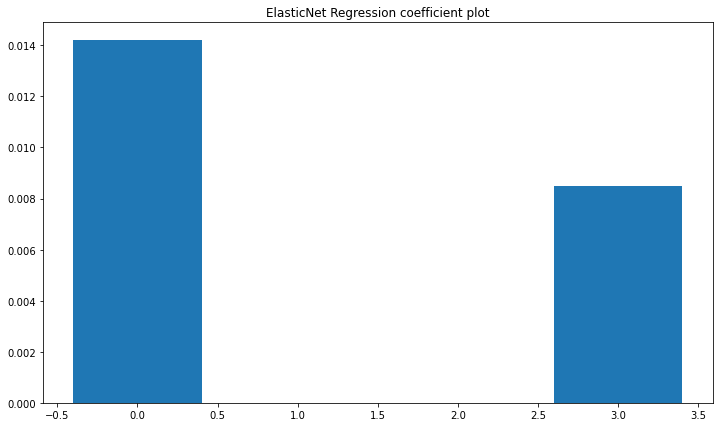

New linear regression score: 0.5805006831505928


In [58]:
agg_df = pd.read_csv("../Resources/aggregated_df.csv", index_col="playerID")
agg_df

# Assign X and y


X = agg_df[["RBI", "R", "twoB", "H"]]

y = agg_df["ADJ Salary"]

# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

# Create a scaler to standardize the data

scaler = StandardScaler()

# Train the scaler with the X_train data.

scaler.fit(X_train)

# Transform X_train and X_test.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

elasticnet_reg = ElasticNet().fit(X_train, y_train)

predicted = elasticnet_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"MSE: {mse}")
print(f"R2: {r2}") 

# Score the model

print(f"ElasticNet Regression Score: {elasticnet_reg.score(X_train_scaled, y_train)}")
print(f"ElasticNet Regression Score: {elasticnet_reg.score(X_test_scaled, y_test)}")

plt.bar(np.arange(len(elasticnet_reg.coef_)), elasticnet_reg.coef_)
plt.title(f'ElasticNet Regression coefficient plot')
plt.show()  

sel = SelectFromModel(elasticnet_reg)
sel.fit(X_train_scaled, y_train)
SelectFromModel(estimator=ElasticNet())

X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)

scaler = StandardScaler().fit(X_selected_train)

X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

new_elasticnet_reg = LinearRegression().fit(X_selected_train_scaled, y_train)
print(f"New linear regression score: {new_elasticnet_reg.score(X_selected_test_scaled, y_test)}")

## Nevertheless, our methods demonstrated substantial improvement in explained variance in our dependent variable.  